# MNIST indepth analysis

In [1]:
#importing functions 
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from skimage.util.montage import montage2d
import tflearn
from PIL import Image
%matplotlib inline

/Users/Enkay/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
#importing data
from tensorflow.examples.tutorials.mnist import input_data
#one hot encoding returns an array of zeros and a single one. One corresponds to the class
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [35]:
print "Shape of images in training dataset {}".format(data.train.images.shape)
print "Shape of classes in training dataset {}".format(data.train.labels.shape)
print "Shape of images in testing dataset {}".format(data.test.images.shape)
print "Shape of classes in testing dataset {}".format(data.test.labels.shape)
print "Shape of images in validation dataset {}".format(data.validation.images.shape)
print "Shape of classes in validation dataset {}".format(data.validation.labels.shape)

Shape of images in training dataset (55000, 784)
Shape of classes in training dataset (55000, 10)
Shape of images in testing dataset (10000, 784)
Shape of classes in testing dataset (10000, 10)
Shape of images in validation dataset (5000, 784)
Shape of classes in validation dataset (5000, 10)


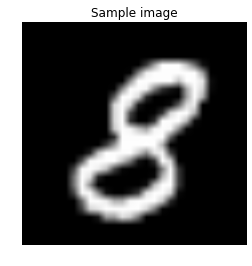

In [4]:
#sample image
sample=data.train.images[5].reshape(28,28) 
plt.imshow(sample ,cmap='gray')
plt.title('Sample image')
plt.axis('off')
plt.show()

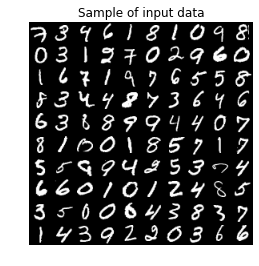

In [5]:
# function to display montage of input data 
imgs=data.train.images[0:100]
montage_img=np.zeros([100,28,28])
for i in range(len(imgs)) : 
        montage_img[i]=imgs[i].reshape(28,28) 
plt.imshow(montage2d(montage_img), cmap='gray')
plt.title('Sample of input data')
plt.axis('off')
plt.show()

In [6]:
images=data.train.images
images=np.reshape(images,[images.shape[0],28,28])
mean_img = np.mean(images, axis=0)
std_img = np.std(images, axis=0)

/Users/Enkay/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


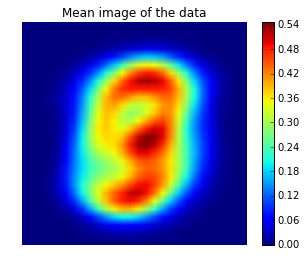

In [7]:
plt.imshow(mean_img)
plt.title('Mean image of the data')
plt.colorbar()
plt.axis('off')
plt.show()

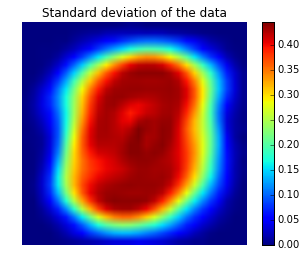

In [8]:
plt.imshow(std_img)
plt.colorbar()
plt.title('Standard deviation of the data')
plt.axis('off')
plt.show()

In [9]:
#input - shape 'None' states that, the value can be anything, i.e we can feed in any number of images
#input image
x=tf.placeholder(tf.float32,shape=[None,784]) 
#input class
y_=tf.placeholder(tf.float32,shape=[None, 10])

# Our Model:
Series of convolutional layers followed by fullyconnected layer and a softmax layer.
## Convolutional layer:
Each convolutional layer consists of convolution operation followed by nonlinear activation function and pooling layer.
## Our model layout: 
Input layer --> Convolutional layer 1 --> Convolutional layer 2 --> Fully Connected Layer 
-- >Softmax layer


In [10]:
#Input Layer

#reshaping input for convolutional operation in tensorflow
# '-1' states that there is no fixed batch dimension, 28x28(=784) is reshaped from 784 pixels and '1' for a single
#channel, i.e a gray scale image
x_input=tf.reshape(x,[-1,28,28,1], name='input')
#first convolutional layer with 32 output filters, filter size 5x5, stride of 2,same padding, and RELU activation.
#please note, I am not adding bias, but one could add bias.Optionally you can add max pooling layer as well 
conv_layer1=tflearn.layers.conv.conv_2d(x_input, nb_filter=32, filter_size=5, strides=[1,1,1,1],
                                        padding='same', activation='relu', regularizer="L2", name='conv_layer_1')

#2x2 max pooling layer
out_layer1=tflearn.layers.conv.max_pool_2d(conv_layer1, 2)


#second convolutional layer 
conv_layer2=tflearn.layers.conv.conv_2d(out_layer1, nb_filter=32, filter_size=5, strides=[1,1,1,1],
                                        padding='same', activation='relu',  regularizer="L2", name='conv_layer_2')
out_layer2=tflearn.layers.conv.max_pool_2d(conv_layer2, 2)
#fully connected layer
fcl= tflearn.layers.core.fully_connected(out_layer2, 1024, activation='relu')
fcl_dropout = tflearn.layers.core.dropout(fcl, 0.8)
y_predicted = tflearn.layers.core.fully_connected(fcl_dropout, 10, activation='softmax', name='output')

In [11]:
print "Shape of input : {}".format(x_input.get_shape().as_list())
print "Shape of first convolutional layer : {}".format(out_layer1.get_shape().as_list())
print "Shape of second convolutional layer : {}".format(out_layer2.get_shape().as_list())
print "Shape of fully connected layer : {}".format(fcl.get_shape().as_list())
print "Shape of output layer : {}".format(y_predicted.get_shape().as_list())

Shape of input : [None, 28, 28, 1]
Shape of first convolutional layer : [None, 14, 14, 32]
Shape of second convolutional layer : [None, 7, 7, 32]
Shape of fully connected layer : [None, 1024]
Shape of output layer : [None, 10]


In [12]:
#loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_predicted), reduction_indices=[1]))
#optimiser -
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
#calculating accuracy of our model 
correct_prediction = tf.equal(tf.argmax(y_predicted,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [13]:
#session parameters
sess = tf.InteractiveSession()
#initialising variables
init = tf.initialize_all_variables()
sess.run(init)


In [14]:
# grabbing the default graph
g = tf.get_default_graph()

# every operations in our graph
[op.name for op in g.get_operations()]

[u'Placeholder',
 u'Placeholder_1',
 u'input/shape',
 u'input',
 u'conv_layer_1/W',
 u'conv_layer_1/W/Initializer/random_uniform/shape',
 u'conv_layer_1/W/Initializer/random_uniform/min',
 u'conv_layer_1/W/Initializer/random_uniform/max',
 u'conv_layer_1/W/Initializer/random_uniform/RandomUniform',
 u'conv_layer_1/W/Initializer/random_uniform/sub',
 u'conv_layer_1/W/Initializer/random_uniform/mul',
 u'conv_layer_1/W/Initializer/random_uniform',
 u'conv_layer_1/W/Assign',
 u'conv_layer_1/W/read',
 u'conv_layer_1/W/Regularizer/L2Loss',
 u'conv_layer_1/W/Regularizer/L2-Loss/y',
 u'conv_layer_1/W/Regularizer/L2-Loss',
 u'conv_layer_1/b',
 u'conv_layer_1/b/Initializer/Const',
 u'conv_layer_1/b/Assign',
 u'conv_layer_1/b/read',
 u'conv_layer_1/Conv2D',
 u'conv_layer_1/BiasAdd',
 u'conv_layer_1/Relu',
 u'MaxPool2D/MaxPool',
 u'conv_layer_2/W',
 u'conv_layer_2/W/Initializer/random_uniform/shape',
 u'conv_layer_2/W/Initializer/random_uniform/min',
 u'conv_layer_2/W/Initializer/random_uniform/ma

In [15]:
#number of interations
epoch=15000
batch_size=50 

In [16]:
for i in range(epoch):
    #batch wise training 
    x_batch, y_batch = data.train.next_batch(batch_size)
    _,loss=sess.run([train_step, cross_entropy], feed_dict={x: x_batch,y_: y_batch})
    #_, loss,acc=sess.run([train_step,cross_entropy,accuracy], feed_dict={x:input_image , y_: input_class})
    
    if i%500==0:    
        Accuracy=sess.run(accuracy,
                           feed_dict={
                        x: data.test.images,
                        y_: data.test.labels
                      })
        Accuracy=round(Accuracy*100,2)
        print "Loss : {} , Accuracy on test set : {} %" .format(loss, Accuracy)
    elif i%100==0:
        print "Loss : {}" .format(loss)   
        

Loss : 2.28293037415 , Accuracy on test set : 11.18 %
Loss : 0.597587764263
Loss : 0.287460297346
Loss : 0.386544346809
Loss : 0.128280937672
Loss : 0.251751989126 , Accuracy on test set : 94.31 %
Loss : 0.0702344104648
Loss : 0.167915225029
Loss : 0.22772346437
Loss : 0.0516111552715
Loss : 0.0974466353655 , Accuracy on test set : 96.85 %
Loss : 0.177406698465
Loss : 0.0460326112807
Loss : 0.162814065814
Loss : 0.0267831366509
Loss : 0.0413384996355 , Accuracy on test set : 97.63 %
Loss : 0.0990437492728
Loss : 0.136322826147
Loss : 0.098825648427
Loss : 0.0265418570489
Loss : 0.030837232247 , Accuracy on test set : 98.04 %
Loss : 0.0933626368642
Loss : 0.0128259947523
Loss : 0.0305090136826
Loss : 0.0323739536107
Loss : 0.220340594649 , Accuracy on test set : 98.14 %
Loss : 0.129726827145
Loss : 0.0139974402264
Loss : 0.0734559446573
Loss : 0.0500608049333
Loss : 0.126619532704 , Accuracy on test set : 98.5 %
Loss : 0.0393156372011
Loss : 0.0593934878707
Loss : 0.149956151843
Loss : 

In [17]:
validation_accuracy=round((sess.run(accuracy,
                            feed_dict={
                             x: data.validation.images,
                             y_: data.validation.labels
                              }))*100,2)

print "Accuracy in the validation dataset: {}%".format(validation_accuracy)

Accuracy in the validation dataset: 99.14%


In [18]:
#testset predictions
y_test=(sess.run(y_predicted,feed_dict={
                             x: data.test.images
                              }))

In [19]:
#Confusion Matrix
true_class=np.argmax(data.test.labels,1)
predicted_class=np.argmax(y_test,1)
cm=confusion_matrix(predicted_class,true_class)
cm

array([[ 976,    0,    0,    0,    0,    2,    3,    0,    3,    0],
       [   1, 1134,    1,    0,    0,    0,    2,    2,    0,    0],
       [   0,    0, 1029,    2,    0,    0,    0,    7,    2,    0],
       [   0,    0,    0, 1002,    0,    7,    1,    1,    2,    1],
       [   0,    0,    0,    0,  976,    0,    4,    0,    0,    3],
       [   0,    0,    0,    2,    0,  879,    4,    0,    1,    1],
       [   1,    0,    0,    0,    1,    1,  944,    0,    0,    0],
       [   0,    1,    2,    0,    0,    0,    0, 1012,    2,    0],
       [   1,    0,    0,    1,    0,    1,    0,    1,  958,    1],
       [   1,    0,    0,    3,    5,    2,    0,    5,    6, 1003]])

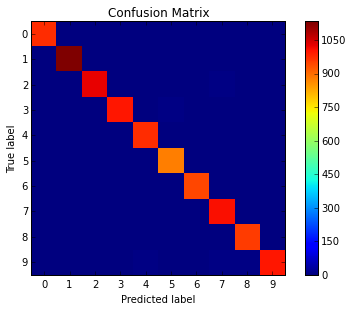

In [20]:
#Plotting confusion Matrix
plt.imshow(cm,interpolation='nearest')
plt.colorbar()
number_of_class=len(np.unique(true_class))
tick_marks = np.arange(len(np.unique(true_class)))
plt.xticks(tick_marks, range(number_of_class))
plt.yticks(tick_marks, range(number_of_class))
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

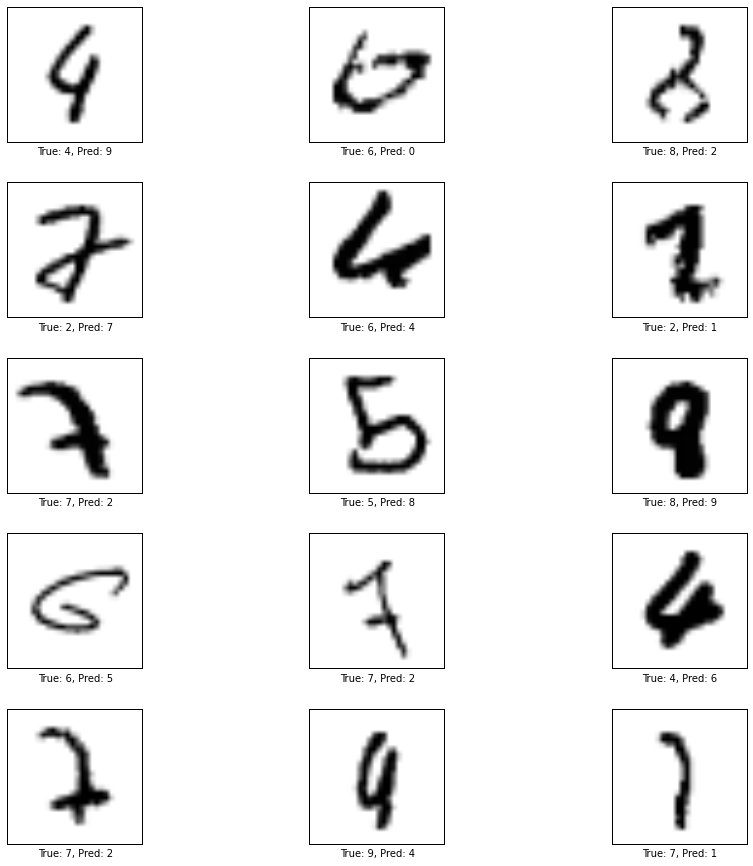

In [21]:
#Finding error outputs
idx=np.argmax(y_test,1)==np.argmax(data.test.labels,1) 
cmp=np.where(idx==False) #indices of error outputs
# plotting errors
fig, axes = plt.subplots(5, 3, figsize=(15,15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
cls_true=np.argmax(data.test.labels,1)[cmp]
cls_pred=np.argmax(y_test,1)[cmp]
images=data.test.images[cmp]
for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28,28), cmap='binary')
        xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])      
plt.show()

In [22]:
conv_layer1_filters=conv_layer1.W.eval()
print conv_layer1_filters.shape

(5, 5, 1, 32)


In [23]:
conv_layer1_filters_img=conv_layer1_filters[:,:,0,:]
print conv_layer1_filters_img.shape

(5, 5, 32)


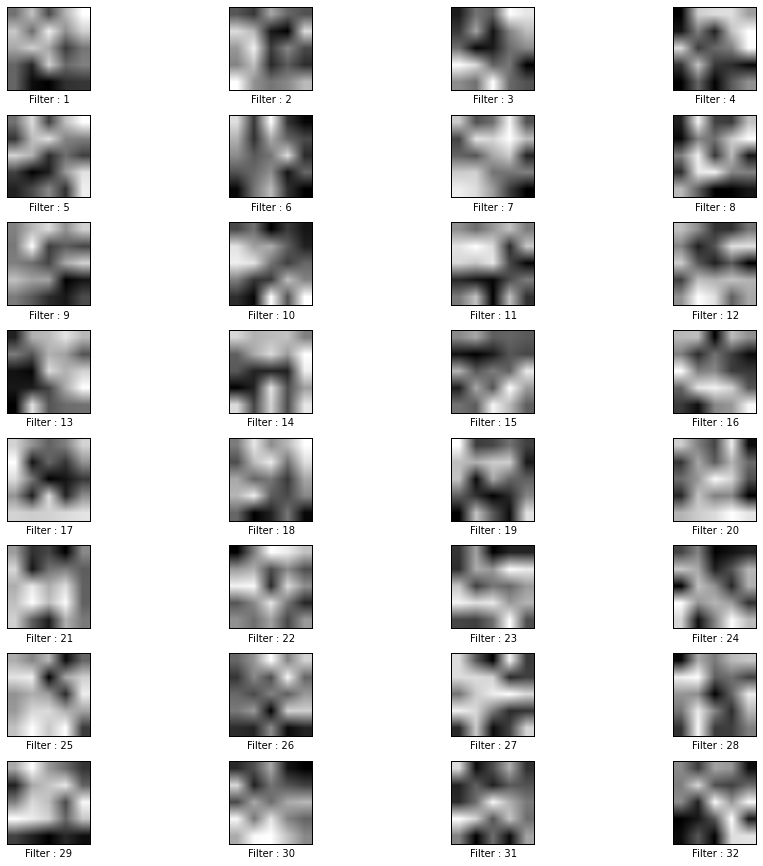

In [24]:
#plotting filters of the first convolutional layer
fig, axes = plt.subplots(8, 4, figsize=(15,15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(axes.flat):
        ax.imshow(conv_layer1_filters_img[:,:,i], cmap='gray')
        xlabel = "Filter : {}".format(i+1)
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([]) 
plt.show()

In [25]:
test_image=np.reshape(data.test.images[0], [1,784])
conv_layer1_output=(sess.run(out_layer1,
               feed_dict={
                   x:test_image
               }))

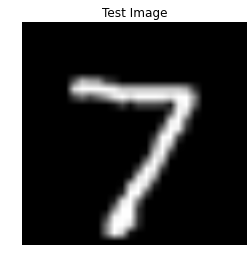

In [26]:
plt.imshow(np.reshape(data.test.images[0], [28,28]), cmap='gray')
plt.title('Test Image')
plt.axis('off')
plt.show()

In [27]:
print conv_layer1_output.shape

(1, 14, 14, 32)


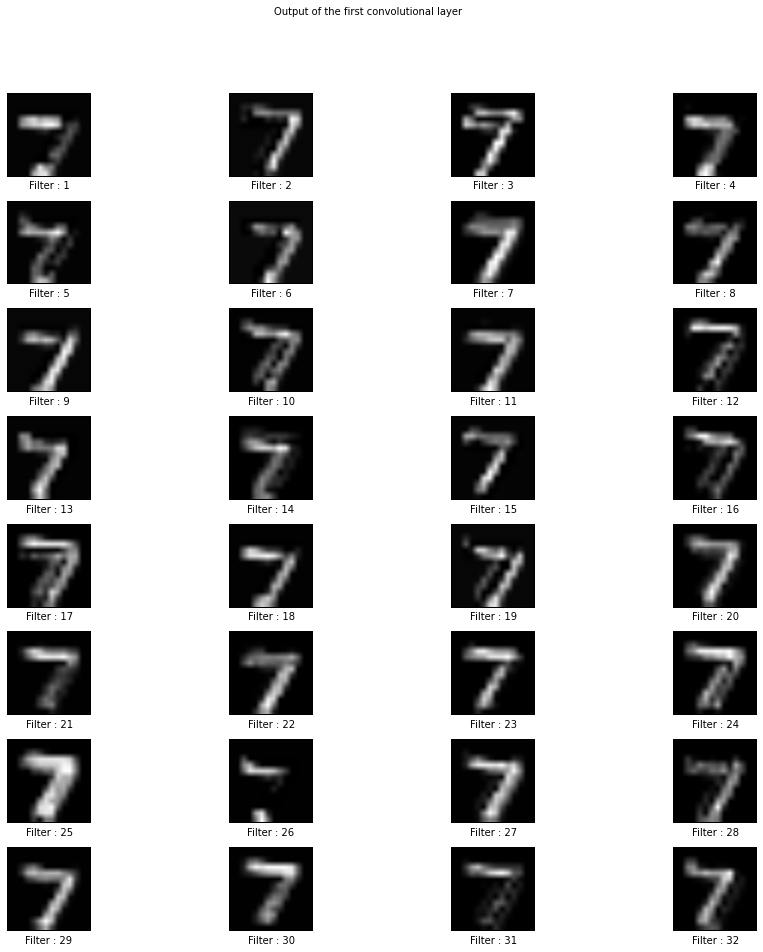

In [28]:

conv_layer1_output_img=conv_layer1_output[0,:,:,:]
fig, axes = plt.subplots(8, 4, figsize=(15,15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i, ax in enumerate(axes.flat):
        ax.imshow(conv_layer1_output_img[:,:,i], cmap='gray')
        xlabel = "Filter : {}".format(i+1)
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])      
fig.suptitle('Output of the first convolutional layer')  
plt.show()

# Testing your own handwritten digits

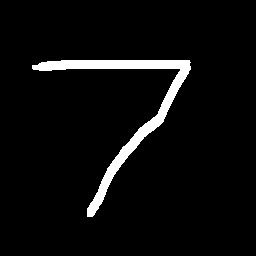

In [29]:
im=Image.open("/Users/Enkay/Documents/Viky/DL-channel/MNIST/images/s4.jpg")
im

In [30]:
im=im.resize((28, 28), Image.ANTIALIAS) #resize the image
im = np.array(im) #convert to an array
im2=im/np.max(im).astype(float) #normalise input
test_image1=np.reshape(im2, [1,784]) # reshape it to our input placeholder shape


In [31]:
pred=(sess.run(y_predicted,
               feed_dict={
                   x:test_image1
               }))
predicted_class=np.argmax(pred)
print "Predicted class : {}" .format(predicted_class)

Predicted class : 7


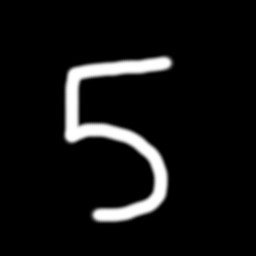

In [32]:
five=Image.open("/Users/Enkay/Documents/Viky/DL-channel/MNIST/images/five.jpeg")
five

In [33]:
five=five.resize((28, 28), Image.ANTIALIAS) #resize the image
five = np.array(five)
five_test=five/np.max(five).astype(float) 
five_test=np.reshape(five_test, [1,784])

In [36]:
pred=(sess.run(y_predicted,
               feed_dict={
                   x:five_test
               }))
predicted_class=np.argmax(pred)
print "Predicted class : {}" .format(predicted_class)

Predicted class : 5
